Simple notebook to test out coffea2024 and llpnanoaod

In [1]:
import awkward as ak
import dask_awkward as dak
import hist.dask as hda
from coffea.nanoevents import NanoEventsFactory

In [2]:
from dask.distributed import Client

client = Client("tls://192.168.204.75:8786")
#client.upload_file("/home/cms-jovyan/SIDM/local_data/tta_mAlp-0p35GeV_ctau-1e3mm_part-0.root")
client

Connection method: Direct,
Dashboard: /user/bryan.cardwell@cern.ch/proxy/8787/status,
Comm: tls://192.168.204.75:8786,Workers: 0
Dashboard: /user/bryan.cardwell@cern.ch/proxy/8787/status,Total threads: 0
Started: 4 hours ago,Total memory: 0 B


In [3]:
events = NanoEventsFactory.from_root(
    #"~/local_data/tta_mAlp-0p35GeV_ctau-1e3mm_part-0.root:Events",
    "https://raw.githubusercontent.com/CoffeaTeam/coffea/master/tests/samples/nano_dy.root:Events",
    metadata={"dataset": "tta_mAlp-0p35GeV_ctau-1e3mm"}
).events()

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:243: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(


In [4]:
events

dask.awkward<from-uproot, npartitions=1>

In [5]:
dak.fields(events)

['fixedGridRhoFastjetAll',
 'LHEWeight',
 'Tau',
 'SoftActivityJetHT',
 'Pileup',
 'luminosityBlock',
 'SoftActivityJetNjets10',
 'CorrT1METJet',
 'TrigObj',
 'TkMET',
 'LHEScaleWeight',
 'OtherPV',
 'LHE',
 'btagWeight',
 'HLTriggerFirstPath',
 'LHEReweightingWeight',
 'ChsMET',
 'SV',
 'L1',
 'SoftActivityJetNjets5',
 'SoftActivityJet',
 'SubGenJetAK8',
 'GenJetAK8',
 'run',
 'fixedGridRhoFastjetCentralNeutral',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'PSWeight',
 'Muon',
 'FsrPhoton',
 'GenVisTau',
 'GenJet',
 'genWeight',
 'LHEPdfWeight',
 'PV',
 'fixedGridRhoFastjetCentralCalo',
 'GenDressedLepton',
 'Photon',
 'Generator',
 'GenMET',
 'L1Reco',
 'fixedGridRhoFastjetCentral',
 'SoftActivityJetHT10',
 'event',
 'GenPart',
 'HLTriggerFinalPath',
 'SoftActivityJetHT5',
 'LHEPart',
 'MET',
 'SoftActivityJetNjets2',
 'IsoTrack',
 'CaloMET',
 'PuppiMET',
 'SubJet',
 'RawMET',
 'L1simulation',
 'Electron',
 'genTtbarId',
 'SoftActivityJetHT2',
 'FatJet',
 'Jet',
 'HLT',
 'HTXS',
 'F

{'from-uproot-abd813fb204492d1fc714dbc7704bc4c': frozenset({'Muon_pt',
            'nMuon'})}

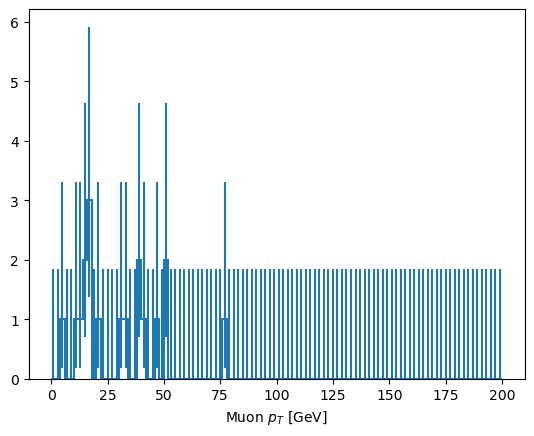

In [6]:
h_mu_pt = (
    hda.Hist.new.Reg(100, 0, 200, name="mu_pt", label="Muon $p_{T}$ [GeV]")
    .Weight()
    .fill(dak.flatten(events.Muon.pt))
)

h_mu_pt.compute().plot1d()
dak.necessary_columns(h_mu_pt)